In [20]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [21]:
OVER_ONE_VAR = ['Albania', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech', 'Denmark', 'Estonia', 'Finland', 'France', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Kosovo', 'Lithuania', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Russia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United_Kingdom', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7', 'Group_8', 'Group_9', 'Group_10', 'Group_11', 'Group_13', 'Group_15', 'Group_16', 'Group_17', 'Group_18', 'Group_19', 'Group_20', 'Group_21', 'Group_23', 'Group_24', 'Group_25', 'Group_26', 'Group_27', 'Group_28', 'Group_29', 'Group_30', 'Group_31', 'Group_32', 'Group_33', 'Group_34', 'Group_35', 'Group_36', 'Group_37', 'Group_39', 'Group_40', 'Group_41', 'Group_42', 'Group_43', 'Group_44', 'Group_45', 'Group_46', 'Group_47', 'Group_48', 'Group_49', 'Group_50', 'Group_51', 'Group_52', 'Group_53', 'Group_54', 'Group_56', 'Group_57', 'Group_58', 'Group_59', 'Group_60', 'Group_61', 'Group_62', 'Group_63', 'Group_64', 'Group_66', 'Group_67', 'Group_68', 'Group_69', 'Group_70', 'Group_71', 'Group_72', 'Group_73', 'Group_74', 'Group_75', 'Group_76', 'Group_77', 'Group_78', 'Group_79', 'Group_80', 'Group_81', 'Group_82', 'Group_83', 'Group_84', 'Group_85', 'Group_86', 'Group_87', 'Group_88', 'Group_89', 'Group_90', 'Group_91', 'Group_92', 'Group_94', 'Group_95', 'Group_96', 'Group_97', 'Group_98', 'Group_99', 'Group_100']
OVER_TWO_VAR = ['Albania', 'Belgium', 'Bulgaria', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'France', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Netherlands', 'Norway', 'Poland', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United_Kingdom', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7', 'Group_8', 'Group_9', 'Group_10', 'Group_11', 'Group_13', 'Group_15', 'Group_16', 'Group_17', 'Group_18', 'Group_19', 'Group_20', 'Group_21', 'Group_23', 'Group_25', 'Group_26', 'Group_27', 'Group_28', 'Group_29', 'Group_30', 'Group_31', 'Group_32', 'Group_33', 'Group_34', 'Group_35', 'Group_36', 'Group_39', 'Group_40', 'Group_41', 'Group_42', 'Group_43', 'Group_44', 'Group_45', 'Group_46', 'Group_47', 'Group_48', 'Group_49', 'Group_50', 'Group_51', 'Group_52', 'Group_53', 'Group_54', 'Group_56', 'Group_57', 'Group_58', 'Group_60', 'Group_61', 'Group_63', 'Group_64', 'Group_66', 'Group_67', 'Group_68', 'Group_69', 'Group_70', 'Group_71', 'Group_72', 'Group_73', 'Group_74', 'Group_75', 'Group_76', 'Group_77', 'Group_78', 'Group_79', 'Group_80', 'Group_81', 'Group_82', 'Group_83', 'Group_84', 'Group_85', 'Group_86', 'Group_87', 'Group_88', 'Group_89', 'Group_90', 'Group_91', 'Group_92', 'Group_94', 'Group_95', 'Group_96', 'Group_97', 'Group_99', 'Group_100']
OVER_THREE_VAR = ['Bulgaria', 'Cyprus', 'Estonia', 'Finland', 'France', 'Iceland', 'Italy', 'Poland', 'Spain', 'Sweden', 'Switzerland', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7', 'Group_8', 'Group_10', 'Group_11', 'Group_13', 'Group_15', 'Group_16', 'Group_17', 'Group_18', 'Group_20', 'Group_21', 'Group_23', 'Group_25', 'Group_27', 'Group_28', 'Group_29', 'Group_30', 'Group_31', 'Group_32', 'Group_33', 'Group_34', 'Group_35', 'Group_36', 'Group_39', 'Group_40', 'Group_41', 'Group_42', 'Group_43', 'Group_44', 'Group_45', 'Group_46', 'Group_47', 'Group_48', 'Group_49', 'Group_50', 'Group_51', 'Group_52', 'Group_53', 'Group_54', 'Group_56', 'Group_57', 'Group_60', 'Group_61', 'Group_63', 'Group_64', 'Group_66', 'Group_67', 'Group_68', 'Group_69', 'Group_70', 'Group_72', 'Group_73', 'Group_74', 'Group_75', 'Group_77', 'Group_78', 'Group_79', 'Group_80', 'Group_81', 'Group_82', 'Group_83', 'Group_84', 'Group_86', 'Group_87', 'Group_88', 'Group_89', 'Group_90', 'Group_92', 'Group_94', 'Group_95', 'Group_96', 'Group_97', 'Group_99', 'Group_100']
OVER_FOUR_VAR = ['Cyprus', 'Finland', 'France', 'Iceland', 'Spain', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7', 'Group_10', 'Group_11', 'Group_13', 'Group_15', 'Group_16', 'Group_18', 'Group_21', 'Group_23', 'Group_25', 'Group_27', 'Group_28', 'Group_29', 'Group_30', 'Group_31', 'Group_32', 'Group_33', 'Group_34', 'Group_35', 'Group_36', 'Group_39', 'Group_40', 'Group_41', 'Group_42', 'Group_43', 'Group_44', 'Group_45', 'Group_46', 'Group_47', 'Group_48', 'Group_49', 'Group_50', 'Group_51', 'Group_52', 'Group_53', 'Group_54', 'Group_57', 'Group_60', 'Group_61', 'Group_63', 'Group_64', 'Group_67', 'Group_68', 'Group_69', 'Group_70', 'Group_72', 'Group_73', 'Group_74', 'Group_75', 'Group_77', 'Group_78', 'Group_79', 'Group_80', 'Group_81', 'Group_86', 'Group_87', 'Group_88', 'Group_89', 'Group_90', 'Group_92', 'Group_94', 'Group_95', 'Group_96', 'Group_97', 'Group_99', 'Group_100']
OVER_FIVE_VAR = ['Spain', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7', 'Group_10', 'Group_11', 'Group_13', 'Group_15', 'Group_16', 'Group_18', 'Group_23', 'Group_25', 'Group_27', 'Group_29', 'Group_30', 'Group_32', 'Group_33', 'Group_34', 'Group_35', 'Group_36', 'Group_39', 'Group_40', 'Group_41', 'Group_42', 'Group_43', 'Group_44', 'Group_45', 'Group_46', 'Group_48', 'Group_49', 'Group_50', 'Group_51', 'Group_53', 'Group_54', 'Group_60', 'Group_61', 'Group_63', 'Group_64', 'Group_67', 'Group_68', 'Group_69', 'Group_70', 'Group_72', 'Group_73', 'Group_74', 'Group_75', 'Group_77', 'Group_78', 'Group_79', 'Group_80', 'Group_87', 'Group_88', 'Group_89', 'Group_90', 'Group_94', 'Group_95', 'Group_96', 'Group_97', 'Group_99', 'Group_100']
OVER_SIX_VAR = ['Group_4', 'Group_6', 'Group_7', 'Group_10', 'Group_11', 'Group_13', 'Group_15', 'Group_16', 'Group_18', 'Group_23', 'Group_27', 'Group_30', 'Group_34', 'Group_35', 'Group_36', 'Group_39', 'Group_40', 'Group_41', 'Group_42', 'Group_44', 'Group_45', 'Group_46', 'Group_48', 'Group_50', 'Group_51', 'Group_53', 'Group_54', 'Group_60', 'Group_61', 'Group_63', 'Group_67', 'Group_68', 'Group_69', 'Group_70', 'Group_72', 'Group_73', 'Group_74', 'Group_75', 'Group_77', 'Group_78', 'Group_79', 'Group_80', 'Group_87', 'Group_88', 'Group_89', 'Group_90', 'Group_94', 'Group_95', 'Group_96', 'Group_97', 'Group_99', 'Group_100']
OVER_SEVEN_VAR = ['Group_4', 'Group_6', 'Group_7', 'Group_10', 'Group_11', 'Group_13', 'Group_15', 'Group_16', 'Group_23', 'Group_27', 'Group_30', 'Group_35', 'Group_36', 'Group_39', 'Group_40', 'Group_41', 'Group_42', 'Group_44', 'Group_45', 'Group_50', 'Group_51', 'Group_53', 'Group_54', 'Group_61', 'Group_63', 'Group_67', 'Group_70', 'Group_72', 'Group_73', 'Group_74', 'Group_75', 'Group_77', 'Group_78', 'Group_79', 'Group_80', 'Group_87', 'Group_88', 'Group_90', 'Group_94', 'Group_95', 'Group_96', 'Group_97', 'Group_99', 'Group_100']
OVER_EIGHT_VAR = ['Group_6', 'Group_7', 'Group_10', 'Group_11', 'Group_13', 'Group_15', 'Group_16', 'Group_23', 'Group_27', 'Group_35', 'Group_36', 'Group_39', 'Group_40', 'Group_41', 'Group_42', 'Group_44', 'Group_45', 'Group_50', 'Group_51', 'Group_53', 'Group_54', 'Group_61', 'Group_63', 'Group_67', 'Group_70', 'Group_72', 'Group_73', 'Group_77', 'Group_78', 'Group_79', 'Group_80', 'Group_87', 'Group_88', 'Group_90', 'Group_94', 'Group_95', 'Group_97', 'Group_99', 'Group_100']
OVER_NINE_VAR = ['Group_6', 'Group_7', 'Group_10', 'Group_11', 'Group_15', 'Group_16', 'Group_23', 'Group_27', 'Group_36', 'Group_39', 'Group_40', 'Group_41', 'Group_42', 'Group_44', 'Group_45', 'Group_50', 'Group_51', 'Group_53', 'Group_54', 'Group_61', 'Group_63', 'Group_67', 'Group_70', 'Group_72', 'Group_73', 'Group_77', 'Group_78', 'Group_79', 'Group_80', 'Group_87', 'Group_88', 'Group_90', 'Group_94', 'Group_95', 'Group_97', 'Group_99', 'Group_100']
OVER_TEN_VAR = ['Group_6', 'Group_7', 'Group_10', 'Group_11', 'Group_15', 'Group_16', 'Group_23', 'Group_27', 'Group_36', 'Group_39', 'Group_40', 'Group_42', 'Group_50', 'Group_51', 'Group_53', 'Group_54', 'Group_61', 'Group_63', 'Group_70', 'Group_72', 'Group_73', 'Group_77', 'Group_78', 'Group_79', 'Group_80', 'Group_87', 'Group_88', 'Group_90', 'Group_94', 'Group_95', 'Group_97', 'Group_99', 'Group_100']

In [22]:
cat_list = ['Openness_to_Change', 'Conservation', 'Self-Enhancement', 'Self-Transcendence',]
val_list = ['Ach', 'Ben', 'Con', 'Hed', 'Pow', 'Sec', 'SD', 'Sti', 'Tra', 'Uni']
close_list = ['Group_76', 'Group_17', 'Group_1', 'Group_88', 'Group_54', 'Group_69', 'Group_86', 'Group_35', 'Group_56', 'Group_26', 'Group_75', 'Group_30', 'Group_97']
real_list = ['close_Openness_to_Change', 'close_Conservation', 'close_Self-Enhancement', 'close_Self-Transcendence', 'close_Ach', 'close_Ben', 'close_Con', 'close_Hed', 'close_Pow', 'close_Sec', 'close_SD', 'close_Sti', 'close_Tra', 'close_Uni']
reverse_list = ['reverse_Ach', 'reverse_Ben', 'reverse_Con', 'reverse_Hed', 'reverse_Pow', 'reverse_Sec', 'reverse_SD', 'reverse_Sti', 'reverse_Tra', 'reverse_Uni', 'reverse_Conservation', 'reverse_Openness_to_Change', 'reverse_Self-Enhancement', 'reverse_Self-Transcendence']
close_reverse_list = ['close_reverse_Ach_1', 'close_reverse_Ben_1', 'close_reverse_Con_1', 'close_reverse_Hed_1close_reverse_Pow_1', 'close_reverse_Sec_1', 'close_reverse_SD_1', 'close_reverse_Sti_1', 'close_reverse_Tra_1', 'close_reverse_Uni_1', 'close_reverse_Openness_to_Change_1', 'close_reverse_Self-Enhancement_1', 'close_reverse_Conservation_1', 'close_reverse_Self-Transcendence_1']
close_2 = ['close_Openness_to_Change_2', 'close_Conservation_2', 'close_Self-Enhancement_2', 'close_Self-Transcendence_2', 'close_Ach_2', 'close_Ben_2', 'close_Con_2', 'close_Hed_2', 'close_Pow_2', 'close_Sec_2', 'close_SD_2', 'close_Sti_2', 'close_Tra_2', 'close_Uni_2']
close_3 = ['close_Openness_to_Change_3', 'close_Conservation_3', 'close_Self-Enhancement_3', 'close_Self-Transcendence_3', 'close_Ach_3', 'close_Ben_3', 'close_Con_3', 'close_Hed_3', 'close_Pow_3', 'close_Sec_3', 'close_SD_3', 'close_Sti_3', 'close_Tra_3', 'close_Uni_3']
close_4 = ['close_Openness_to_Change_4', 'close_Conservation_4', 'close_Self-Enhancement_4', 'close_Self-Transcendence_4', 'close_Ach_4', 'close_Ben_4', 'close_Con_4', 'close_Hed_4', 'close_Pow_4', 'close_Sec_4', 'close_SD_4', 'close_Sti_4', 'close_Tra_4', 'close_Uni_4']
close_5 = ['close_Openness_to_Change_5', 'close_Conservation_5', 'close_Self-Enhancement_5', 'close_Self-Transcendence_5', 'close_Ach_5', 'close_Ben_5', 'close_Con_5', 'close_Hed_5', 'close_Pow_5', 'close_Sec_5', 'close_SD_5', 'close_Sti_5', 'close_Tra_5', 'close_Uni_5']
close_6 = ['close_Openness_to_Change_6', 'close_Conservation_6', 'close_Self-Enhancement_6', 'close_Self-Transcendence_6', 'close_Ach_6', 'close_Ben_6', 'close_Con_6', 'close_Hed_6', 'close_Pow_6', 'close_Sec_6', 'close_SD_6', 'close_Sti_6', 'close_Tra_6', 'close_Uni_6']
close_7 = ['close_Openness_to_Change_7', 'close_Conservation_7', 'close_Self-Enhancement_7', 'close_Self-Transcendence_7', 'close_Ach_7', 'close_Ben_7', 'close_Con_7', 'close_Hed_7', 'close_Pow_7', 'close_Sec_7', 'close_SD_7', 'close_Sti_7', 'close_Tra_7', 'close_Uni_7']
close_8 = ['close_Openness_to_Change_8', 'close_Conservation_8', 'close_Self-Enhancement_8', 'close_Self-Transcendence_8', 'close_Ach_8', 'close_Ben_8', 'close_Con_8', 'close_Hed_8', 'close_Pow_8', 'close_Sec_8', 'close_SD_8', 'close_Sti_8', 'close_Tra_8', 'close_Uni_8']
close_9 = ['close_Openness_to_Change_9', 'close_Conservation_9', 'close_Self-Enhancement_9', 'close_Self-Transcendence_9', 'close_Ach_9', 'close_Ben_9', 'close_Con_9', 'close_Hed_9', 'close_Pow_9', 'close_Sec_9', 'close_SD_9', 'close_Sti_9', 'close_Tra_9', 'close_Uni_9']
close_10 = ['close_Openness_to_Change_10', 'close_Conservation_10', 'close_Self-Enhancement_10', 'close_Self-Transcendence_10', 'close_Ach_10', 'close_Ben_10', 'close_Con_10', 'close_Hed_10', 'close_Pow_10', 'close_Sec_10', 'close_SD_10', 'close_Sti_10', 'close_Tra_10', 'close_Uni_10']

ls = cat_list + val_list + real_list + close_2 + close_3 + close_4 + close_5 + close_6 + close_7 + close_8 + close_9 + close_10
group_list = [f'Group_{num+1}' for num in range(100)]

In [23]:
# val_list = ['Openness_to_Change', 'Conservation', 'Self-Enhancement', 'Self-Transcendence', 'Ach', 'Ben', 'Con', 'Hed', 'Pow', 'Sec', 'SD', 'Sti', 'Tra', 'Uni']
# group_list = [f'Group_{num+1}' for num in range(100)]
# close_1 = ['close_Openness_to_Change', 'close_Conservation', 'close_Self-Enhancement', 'close_Self-Transcendence', 'close_Ach', 'close_Ben', 'close_Con', 'close_Hed', 'close_Pow', 'close_Sec', 'close_SD', 'close_Sti', 'close_Tra', 'close_Uni']
# close_2 = ['close_Openness_to_Change_2', 'close_Conservation_2', 'close_Self-Enhancement_2', 'close_Ach_2', 'close_Ben_2', 'close_Con_2', 'close_Hed_2', 'close_Pow_2', 'close_Sec_2', 'close_SD_2', 'close_Sti_2', 'close_Tra_2', 'close_Uni_2']
# close_3 = ['close_Openness_to_Change_3', 'close_Conservation_3', 'close_Self-Enhancement_3', 'close_Self-Transcendence_3', 'close_Ach_3', 'close_Ben_3', 'close_Con_3', 'close_Hed_3', 'close_Pow_3', 'close_Sec_3', 'close_SD_3', 'close_Sti_3', 'close_Tra_3', 'close_Uni_3']
# close_4 = ['close_Openness_to_Change_4', 'close_Conservation_4', 'close_Self-Enhancement_4', 'close_Self-Transcendence_4', 'close_Ach_4', 'close_Ben_4', 'close_Con_4', 'close_Hed_4', 'close_Pow_4', 'close_Sec_4', 'close_SD_4', 'close_Sti_4', 'close_Tra_4', 'close_Uni_4']
# close_5 = ['close_Openness_to_Change_5', 'close_Conservation_5', 'close_Self-Enhancement_5', 'close_Self-Transcendence_5', 'close_Ach_5', 'close_Ben_5', 'close_Con_5', 'close_Hed_5', 'close_Pow_5', 'close_Sec_5', 'close_SD_5', 'close_Sti_5', 'close_Tra_5', 'close_Uni_5']
# close_6 = ['close_Openness_to_Change_6', 'close_Conservation_6', 'close_Self-Enhancement_6', 'close_Self-Transcendence_6', 'close_Ach_6', 'close_Ben_6', 'close_Con_6', 'close_Hed_6', 'close_Pow_6', 'close_Sec_6', 'close_SD_6', 'close_Tra_6', 'close_Uni_6']
# close_7 = ['close_Openness_to_Change_7', 'close_Conservation_7', 'close_Self-Enhancement_7', 'close_Self-Transcendence_7', 'close_Ach_7', 'close_Ben_7', 'close_Con_7', 'close_Hed_7', 'close_Pow_7', 'close_Sec_7', 'close_SD_7', 'close_Sti_7', 'close_Tra_7', 'close_Uni_7']
# close_8 = ['close_Openness_to_Change_8', 'close_Conservation_8', 'close_Self-Enhancement_8', 'close_Self-Transcendence_8', 'close_Ach_8', 'close_Ben_8', 'close_Con_8', 'close_Hed_8', 'close_Pow_8', 'close_Sec_8', 'close_SD_8', 'close_Sti_8', 'close_Tra_8', 'close_Uni_8']
# close_9 = ['close_Openness_to_Change_9', 'close_Conservation_9', 'close_Self-Enhancement_9', 'close_Self-Transcendence_9', 'close_Ach_9', 'close_Ben_9', 'close_Con_9', 'close_Hed_9', 'close_Pow_9', 'close_Sec_9', 'close_SD_9', 'close_Sti_9', 'close_Tra_9', 'close_Uni_9']
# close_10 = ['close_Openness_to_Change_10', 'close_Conservation_10', 'close_Self-Enhancement_10', 'close_Ach_10', 'close_Ben_10', 'close_Con_10', 'close_Hed_10', 'close_Pow_10', 'close_Sec_10', 'close_SD_10', 'close_Sti_10', 'close_Tra_10', 'close_Uni_10']
# reverse_list = ['reverse_Ach', 'reverse_Ben', 'reverse_Con', 'reverse_Hed', 'reverse_Pow', 'reverse_Sec', 'reverse_SD', 'reverse_Sti', 'reverse_Tra', 'reverse_Uni', 'reverse_Conservation', 'reverse_Openness_to_Change', 'reverse_Self-Enhancement', 'reverse_Self-Transcendence']
# close_reverse_list = ['close_reverse_Ach_1', 'close_reverse_Ben_1', 'close_reverse_Con_1', 'close_reverse_Hed_1close_reverse_Pow_1', 'close_reverse_Sec_1', 'close_reverse_SD_1', 'close_reverse_Sti_1', 'close_reverse_Tra_1', 'close_reverse_Uni_1', 'close_reverse_Openness_to_Change_1', 'close_reverse_Self-Enhancement_1', 'close_reverse_Conservation_1', 'close_reverse_Self-Transcendence_1']

# ls = val_list + close_1 + close_2 + close_3 + close_4 + close_5 + close_6 + close_7 + close_8 + close_9

In [24]:
country_dist = pd.read_csv('../data/country_and_group.csv', sep='\t')
# country_dist = country_dist[:128]
# country_dist.drop(columns=['Unnamed: 0'], inplace=True)
country_dist

,Country,Achievement,Benevolence,Conformity,Hedonism,Power,Security,Self-direction,Stimulation,Tradition,Universalism
0,Albania,4.65,5.23,4.56,4.52,3.89,5.15,4.69,3.76,4.91,5.000000
1,Belgium,3.95,5.11,4.16,4.41,3.37,4.60,4.64,3.74,4.48,4.880000
2,Bulgaria,4.66,5.08,4.59,3.66,3.74,5.17,4.28,3.60,4.71,4.860000
3,Cyprus,4.24,5.35,4.11,4.20,3.65,5.56,5.02,3.77,4.93,5.140000
4,Czech,3.87,4.54,4.26,3.94,3.86,4.76,4.55,3.53,4.21,4.480000
...,...,...,...,...,...,...,...,...,...,...,...
277,close_Uni_5,2.00,2.50,1.00,2.00,2.00,3.50,1.50,2.00,2.50,4.666667
278,close_Uni_6,1.00,1.00,2.50,1.50,1.00,1.00,1.50,1.00,1.00,2.666667
279,close_Uni_7,2.00,3.50,3.00,2.50,3.50,2.00,3.00,3.00,2.50,5.000000
280,close_Uni_8,2.50,2.00,2.00,3.00,2.50,1.50,2.00,3.00,3.00,4.333333


In [25]:
# make a dataframe
def count_low_p_val(df):
    
    pos_count = 0
    neg_count = 0
    
    for index, row in df.iterrows():
        if row['p-value'] < 0.05:
            if row['correlation'] > 0:
                pos_count += 1
            else:
                neg_count += 1
    
    return pos_count, neg_count

In [26]:
def mean_results(df):
    risks_list= df.columns[1:]
    for risk in risks_list:
        mean = df[risk].mean()
        print(f"Mean of {risk}: {round(mean, 3)}")

In [27]:
def make_correlation_dataframe(df):
    model_list = df['model'].values.tolist()
    dist = country_dist[country_dist['Country'].isin(model_list)]
    
    correlation_results = []
    for value in dist.columns[1:]:
        for category in df.columns[1:]:
            rho, pval = pearsonr(dist[value], df[category])
            correlation_results.append([value, category, rho, pval])
    corr_df = pd.DataFrame(correlation_results, columns=['value', 'category', 'correlation', 'p-value'])
    return corr_df

In [28]:
def print_sig_corr(df):
    for index, row in df.iterrows():
        if row['p-value'] < 0.05:
            print(f"{row['value']} & {row['category']}: {round(row['correlation'], 3)}")

In [29]:
def print_little_sig_corr(df):
    for index, row in df.iterrows():
        if row['p-value'] >= 0.05 and row['p-value'] < 0.1:
            print(f"{row['value']} & {row['category']}: {round(row['correlation'], 3)} (p-value: {round(row['p-value'], 3)})")

In [30]:
def plot_correlation(corr_df, title):
    pivot_df = corr_df.pivot(index='value', columns='category', values='correlation')
    plt.figure(figsize=(20, 10))
    ax = sns.heatmap(
        pivot_df,
        annot=True, 
        cmap='coolwarm', 
        center=0, 
        fmt=".2f",
        annot_kws={"size": 15},
        # vmin=-0.25, vmax=0.25,
        linewidths=0.1,
        linecolor='white',
        )

    count = 0
    for text in ax.texts:
        p_val = corr_df['p-value'].values[count]
        if p_val < 0.05:
            text.set_text(
                text.get_text() + "*"
                )
        count+=1

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=90, ha='right')
    plt.yticks(fontsize=20)
    plt.title(f'Correlation between Value and {title}', fontsize=25)
    plt.show()

In [31]:
def make_pos_neg_df(df):
    corr_df = make_correlation_dataframe(df)
    pos_count, neg_count = count_low_p_val(corr_df)
    # mean_results(df)
    
    print(f'Positive Correlation: {pos_count}')
    print(f'Negative Correlation: {neg_count}')

In [32]:
bt_chat_file_path = f'../results/beavertails/finetuning/llama2-chat-v3/qa-moderation/flagged_proportion.csv'
# bt_base_file_path1 = f'../results/beavertails/finetuning/llama2/qa-moderation/flagged_proportion.csv'
bt_base_file_path = f'../results/beavertails/finetuning/llama2/qa-moderation/ex_flagged_proportion.csv'

chat_score_file_path = f'../results/HEx-PHI/finetuning/llama2-chat-v3/gpt4_turbo_avg_harm.csv'
chat_prop_file_path = f'../results/HEx-PHI/finetuning/llama2-chat-v3/gpt4_turbo_prop_harm.csv'

# base_score_file_path1 = f'../results/HEx-PHI/finetuning/llama2/gpt4_turbo_avg_harm.csv'
# base_score_file_path = f'../results/HEx-PHI/finetuning/llama2/gpt4_turbo_avg_harm_ex.csv'
# base_prop_file_path1 = f'../results/HEx-PHI/finetuning/llama2/gpt4_turbo_prop_harm.csv'
# base_prop_file_path = f'../results/HEx-PHI/finetuning/llama2/gpt4_turbo_prop_harm_ex.csv'

base_score_file_path = f'../results/HEx-PHI/finetuning/llama2/gpt4_avg_harm_ex.csv'
base_prop_file_path = f'../results/HEx-PHI/finetuning/llama2/gpt4_prop_harm_ex.csv'

#### from here

In [33]:
over_list = ls

### BeaverTails

In [34]:
chat_df = pd.read_csv(bt_chat_file_path)
# df = df[df['model'].str.contains('Group')]
chat_df = chat_df[chat_df['model'].isin(over_list)]

base_df = pd.read_csv(bt_base_file_path)
base_df.drop_duplicates(inplace=True)
base_df = base_df[base_df['model'].isin(over_list)]
base_df = base_df[~base_df['model'].isin(['vanilla', 'alpaca', 'dolly', 'samsum', 'grammar'])]

print('the number of chat models:', len(chat_df))
print('the number of base models:', len(base_df))

the number of chat models: 14
the number of base models: 154


Base
Positive Correlation: 6
Negative Correlation: 5


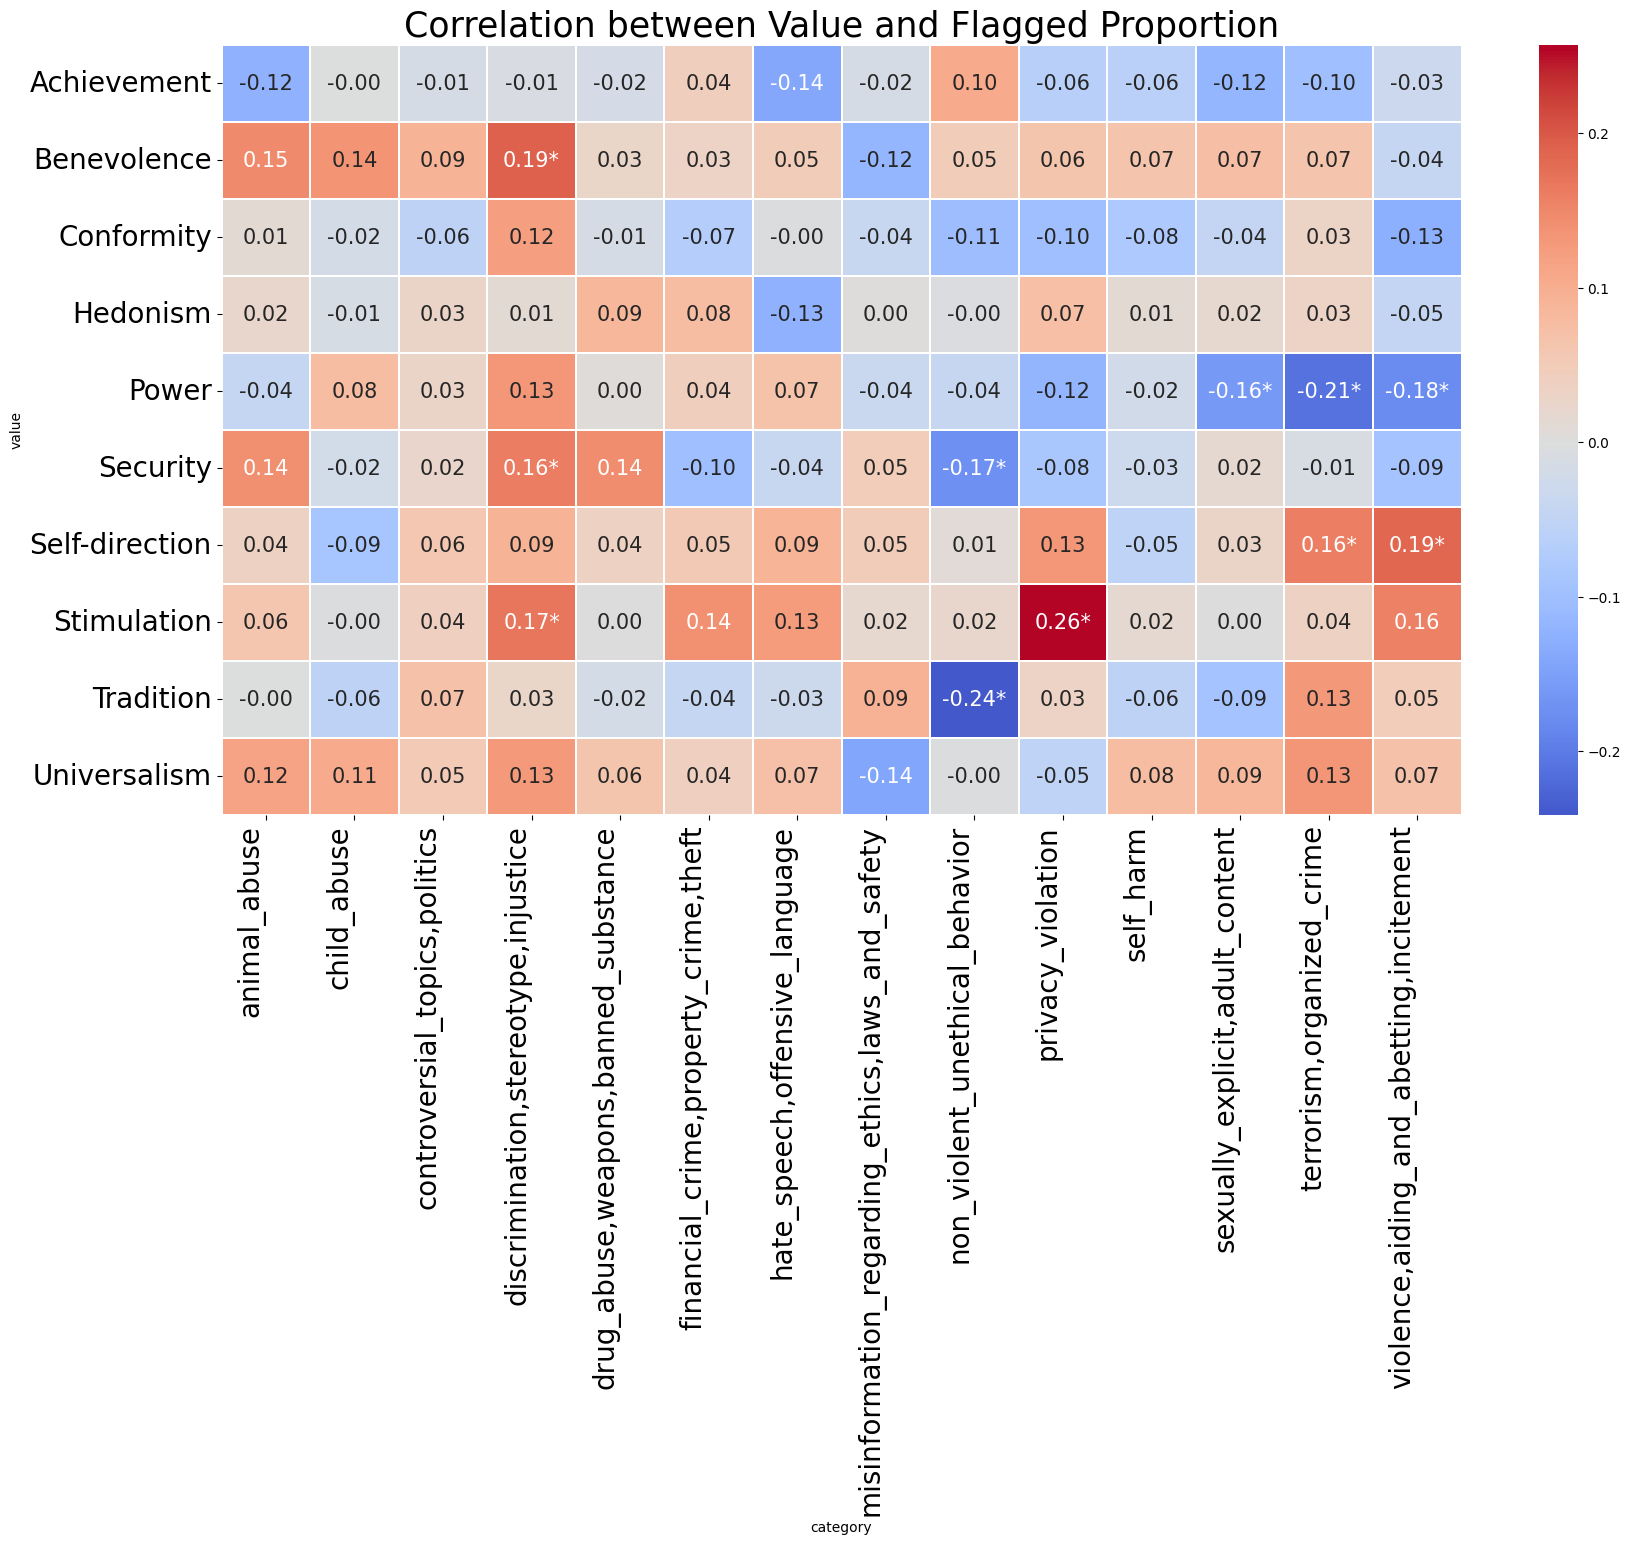

Benevolence & discrimination,stereotype,injustice: 0.193
Power & sexually_explicit,adult_content: -0.161
Power & terrorism,organized_crime: -0.211
Power & violence,aiding_and_abetting,incitement: -0.18
Security & discrimination,stereotype,injustice: 0.161
Security & non_violent_unethical_behavior: -0.173
Self-direction & terrorism,organized_crime: 0.159
Self-direction & violence,aiding_and_abetting,incitement: 0.187
Stimulation & discrimination,stereotype,injustice: 0.169
Stimulation & privacy_violation: 0.257
Tradition & non_violent_unethical_behavior: -0.241
if...
Achievement & hate_speech,offensive_language: -0.142 (p-value: 0.079)
Benevolence & animal_abuse: 0.148 (p-value: 0.067)
Benevolence & child_abuse: 0.137 (p-value: 0.091)
Security & animal_abuse: 0.142 (p-value: 0.078)
Security & drug_abuse,weapons,banned_substance: 0.143 (p-value: 0.077)
Stimulation & financial_crime,property_crime,theft: 0.139 (p-value: 0.086)
Stimulation & violence,aiding_and_abetting,incitement: 0.156 (

In [35]:
print('Base')
base_corr_df = make_correlation_dataframe(base_df)
make_pos_neg_df(base_df)
plot_correlation(base_corr_df, 'Flagged Proportion')
print_sig_corr(base_corr_df)
print('if...')
print_little_sig_corr(base_corr_df)
print('\n')

# print('Chat')
# chat_corr_df = make_correlation_dataframe(chat_df)
# make_pos_neg_df(chat_df)
# plot_correlation(chat_corr_df, 'Flagged Proportion')
# print_sig_corr(chat_corr_df)
# print('if...')
# print_little_sig_corr(chat_corr_df)

### HEx-PHI

In [36]:
chat_score_df = pd.read_csv(chat_score_file_path)
chat_score_df = chat_score_df[chat_score_df['model'].isin(over_list)]
print(len(chat_score_df))
chat_prop_df = pd.read_csv(chat_prop_file_path)
chat_prop_df = chat_prop_df[chat_prop_df['model'].isin(over_list)]
print(len(chat_prop_df))

base_score_df = pd.read_csv(base_score_file_path)
base_score_df = base_score_df[base_score_df['model'].isin(over_list)]
print(len(base_score_df))
base_prop_df = pd.read_csv(base_prop_file_path)
base_prop_df = base_prop_df[base_prop_df['model'].isin(over_list)]
print(len(base_prop_df))

14
14
154
154


================HARMFULNESS SCORE================
Base
Positive Correlation: 2
Negative Correlation: 6


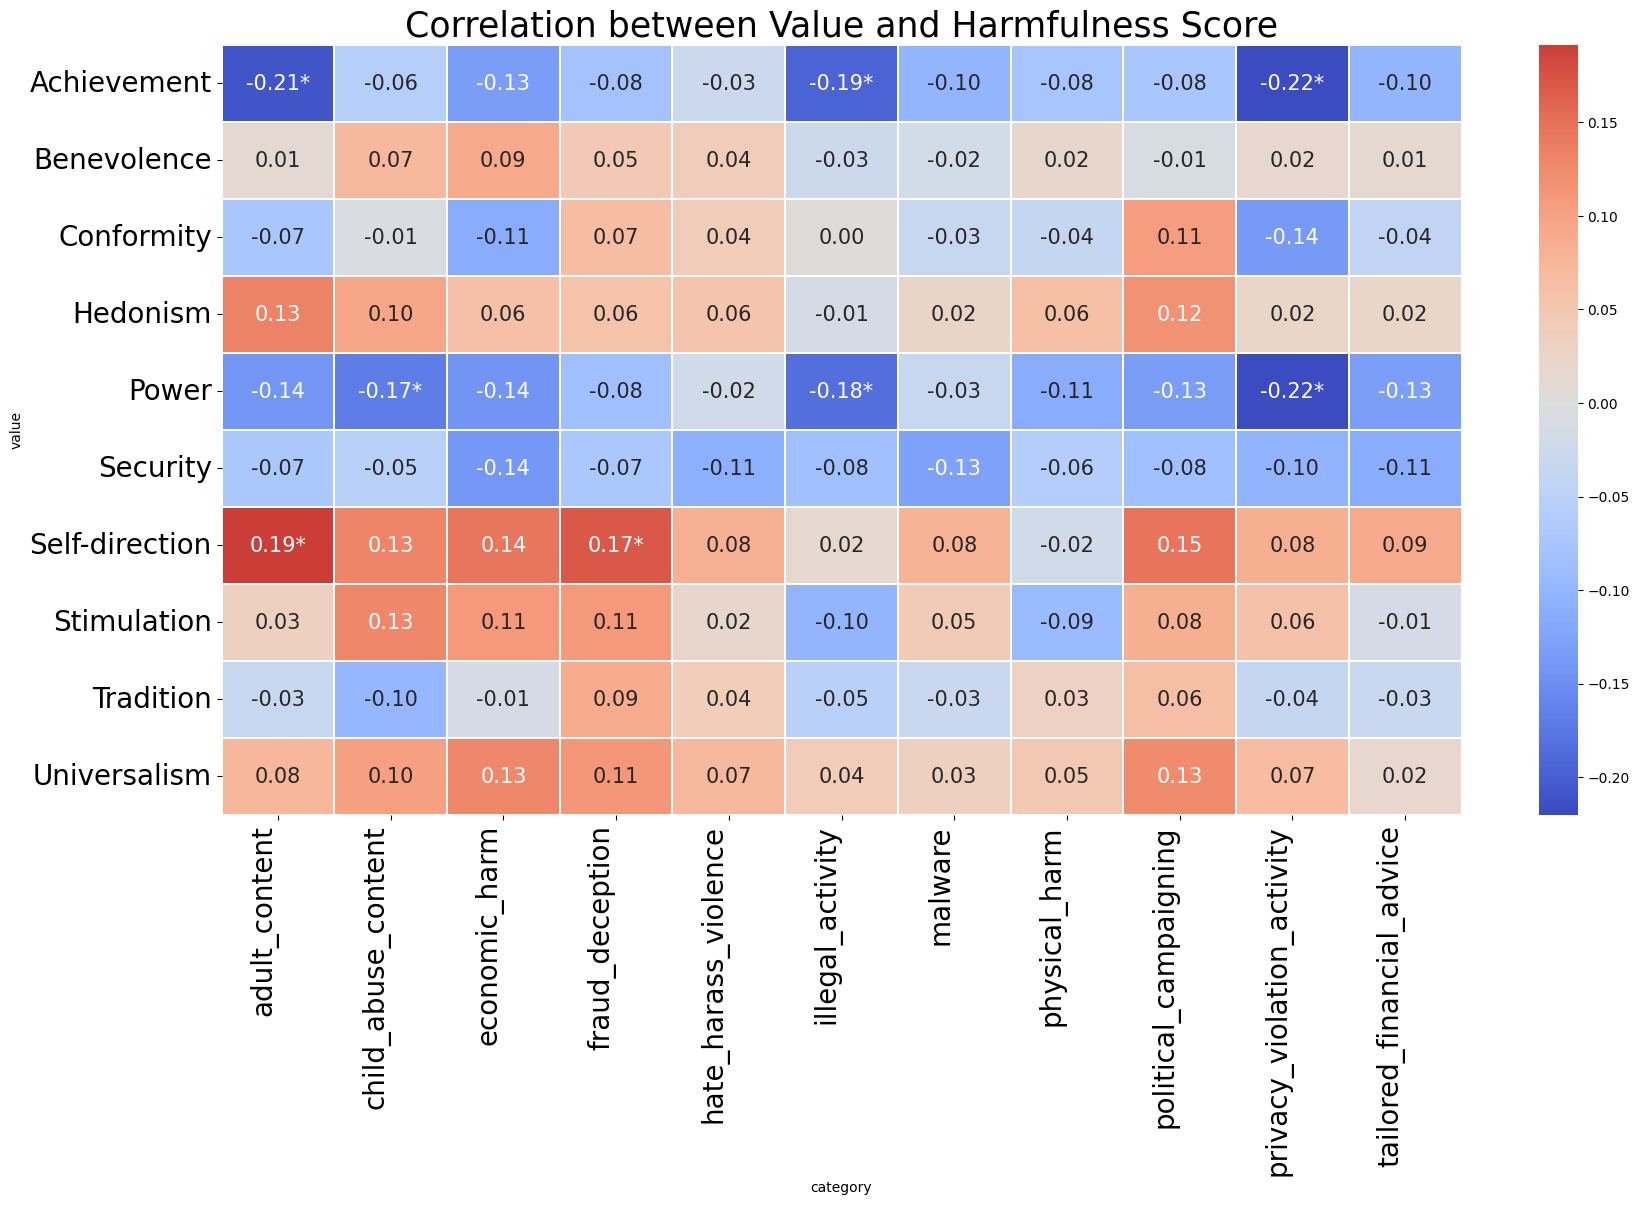

Achievement & adult_content: -0.209
Achievement & illegal_activity: -0.195
Achievement & privacy_violation_activity: -0.22
Power & child_abuse_content: -0.169
Power & illegal_activity: -0.184
Power & privacy_violation_activity: -0.218
Self-direction & adult_content: 0.191
Self-direction & fraud_deception: 0.17
if...
Achievement & economic_harm: -0.133 (p-value: 0.099)
Conformity & privacy_violation_activity: -0.136 (p-value: 0.092)
Power & adult_content: -0.14 (p-value: 0.083)
Power & economic_harm: -0.144 (p-value: 0.075)
Security & economic_harm: -0.14 (p-value: 0.084)
Self-direction & economic_harm: 0.144 (p-value: 0.075)
Self-direction & political_campaigning: 0.147 (p-value: 0.069)




In [37]:
print('================HARMFULNESS SCORE================')
print('Base')
base_score_corr_df = make_correlation_dataframe(base_score_df)
make_pos_neg_df(base_score_df)
plot_correlation(base_score_corr_df, 'Harmfulness Score')
print_sig_corr(base_score_corr_df)
print('if...')
print_little_sig_corr(base_score_corr_df)
print('\n')

# print('Chat')
# chat_score_corr_df = make_correlation_dataframe(chat_score_df)
# make_pos_neg_df(chat_score_df)
# plot_correlation(chat_score_corr_df, 'Harmfulness Score')
# print_sig_corr(chat_score_corr_df)
# print('if...')
# print_little_sig_corr(chat_score_corr_df)

================HARMFULNESS RATE================
Base
Positive Correlation: 5
Negative Correlation: 9


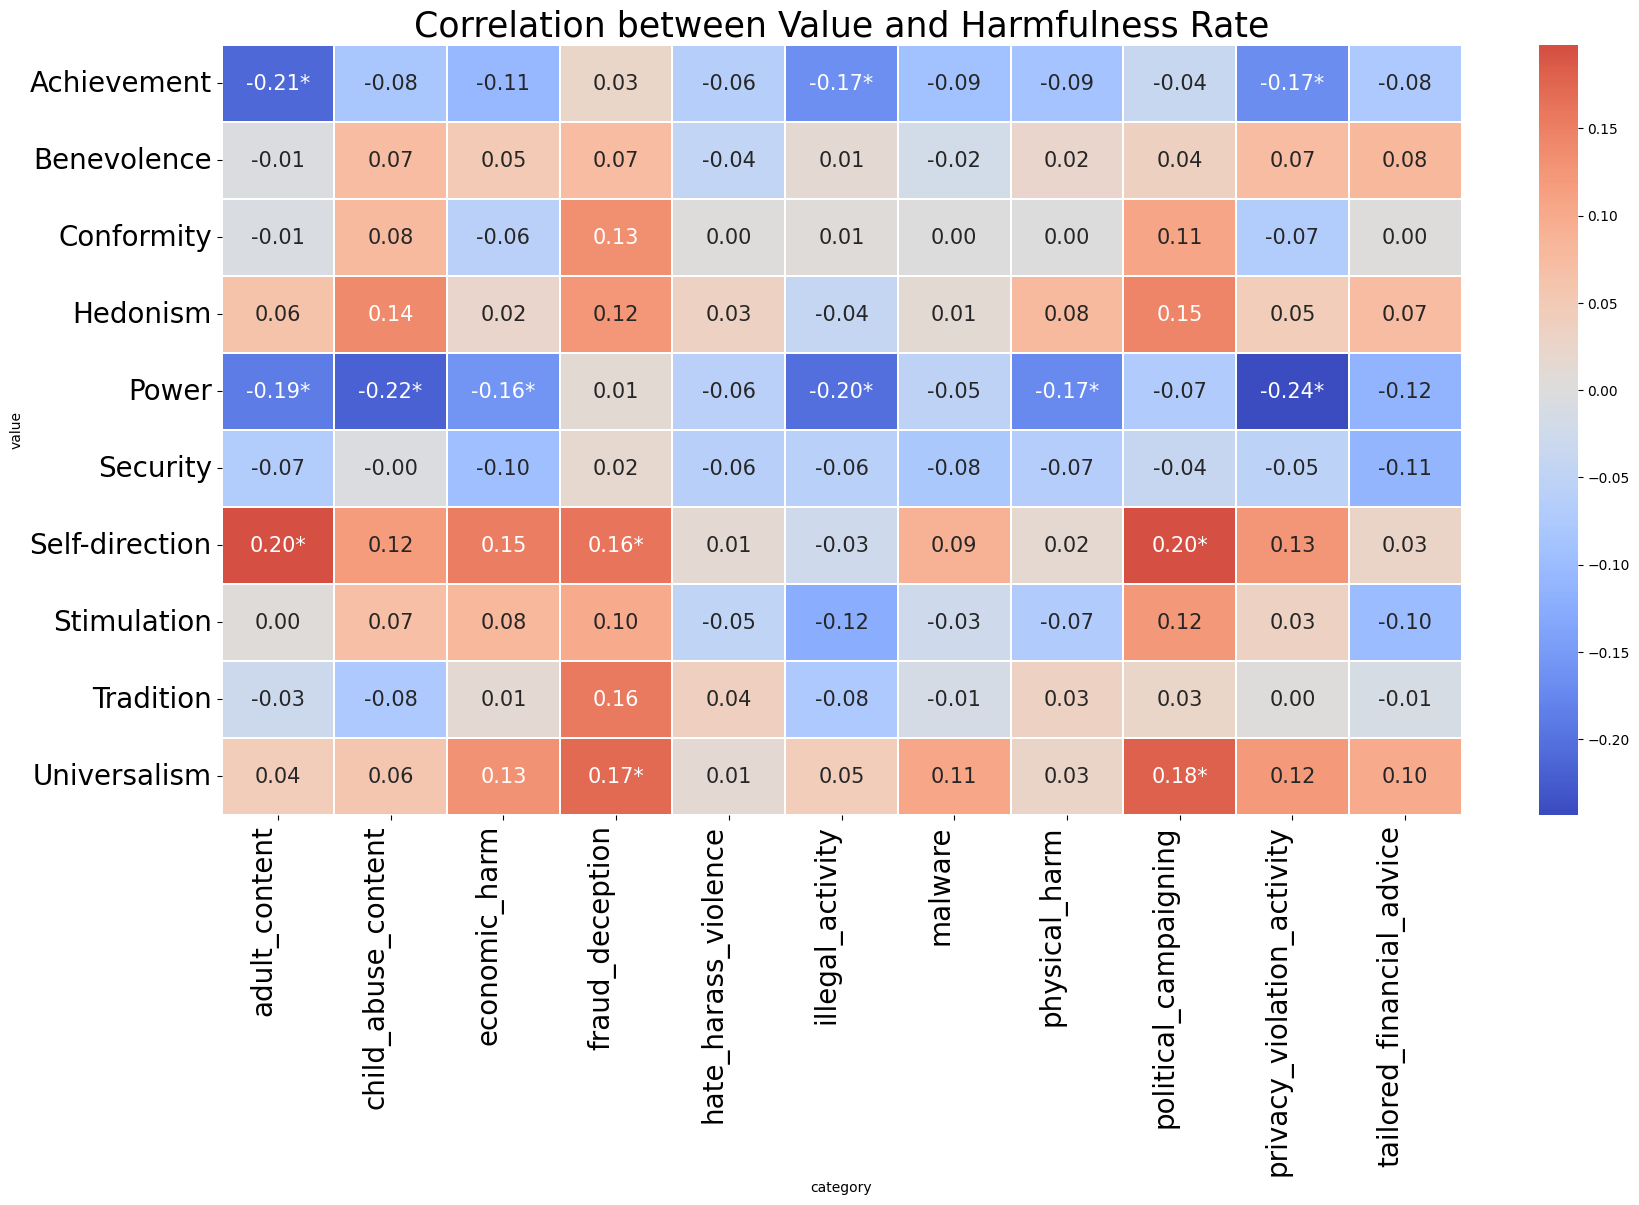

Achievement & adult_content: -0.211
Achievement & illegal_activity: -0.166
Achievement & privacy_violation_activity: -0.168
Power & adult_content: -0.189
Power & child_abuse_content: -0.218
Power & economic_harm: -0.159
Power & illegal_activity: -0.205
Power & physical_harm: -0.172
Power & privacy_violation_activity: -0.244
Self-direction & adult_content: 0.196
Self-direction & fraud_deception: 0.162
Self-direction & political_campaigning: 0.198
Universalism & fraud_deception: 0.172
Universalism & political_campaigning: 0.181
if...
Conformity & fraud_deception: 0.134 (p-value: 0.098)
Hedonism & child_abuse_content: 0.14 (p-value: 0.084)
Hedonism & political_campaigning: 0.146 (p-value: 0.071)
Self-direction & economic_harm: 0.153 (p-value: 0.059)
Tradition & fraud_deception: 0.155 (p-value: 0.054)




In [38]:
print('================HARMFULNESS RATE================')
print('Base')
base_prop_corr_df = make_correlation_dataframe(base_prop_df)
make_pos_neg_df(base_prop_df)
plot_correlation(base_prop_corr_df, 'Harmfulness Rate')
print_sig_corr(base_prop_corr_df)
print('if...')
print_little_sig_corr(base_prop_corr_df)
print('\n')

# print('Chat')
# chat_prop_corr_df = make_correlation_dataframe(chat_prop_df)
# make_pos_neg_df(chat_prop_df)
# plot_correlation(chat_prop_corr_df, 'Harmfulness Rate')retretkrdhlkgfjdsflkjdslfkjsdlfkjadslkjsdfldskjfsdalkfjsdlkjlkjlkj
# print_sig_corr(chat_prop_corr_df)
# print('if...')
# print_little_sig_corr(chat_prop_corr_df)